## Day 47 Lecture 2 Assignment

In this assignment, we will perform K-Medoids clustering using responses to a survey about student life at a university.

In [128]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from pyclustering.cluster.kmedoids import kmedoids
import random

In [129]:
def get_df(url):
  df = pd.read_csv(url)
  return df

This dataset consists of 35 binary features, each corresponding to a yes/no question that characterizes the student taking the survey.

This dataset contains a large number of features, each corresponding to a survey question. The feature name summarizes the survey question, so we will not list them all out here.

Load the dataset.

In [130]:
# answer goes here
df = get_df('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/student_life_survey.csv')
df

,Q2-Participated in Societies and Interest Groups,Q2-Participated in Clubs,"Q2-Participated in Halls, JCRCs and/or Residential College CSCs",Q2-Participated in University organised events,Q3-Interested in Arts & Culture,Q3-Interested in Science & Technology,Q3-Interested in Research and independent study,Q3-Interested in Sports,"Q3-Interested in Other competitions (eg case, debates)",Q3-Interested in Entrepreneurship,Q3-Interested in Volunteering,Q3-Interested in Others,Q4-Passionate about Animal welfare,Q4-Passionate about Arts/Culture/Heritage,Q4-Passionate about Children/Youth,Q4-Passionate about Community building,"Q4-Passionate about Diversity & Inclusion (e.g. special needs, migrant worker, interfaith and intercultural understanding)",Q4-Passionate about Environmental sustainability,Q4-Passionate about Families,Q4-Passionate about Health/Well-being (e.g mental health),Q4-Passionate about Seniors,Q4-Passionate about Poverty reduction,Q4-Passionate about Education,Q4-Passionate about None of the above,Q4-Passionate about Others,Q5-Stressed about Adjustment issues,Q5-Stressed about Academic issues,Q5-Stressed about Financial issues,Q5-Stressed about Family issues,Q5-Stressed about Friendships,Q5-Stressed about Romantic relationships,Q5-Stressed about Health related issues,Q5-Stressed about Career related issues,"Q5-Stressed about My involvement in hostel, clubs, societies, interest groups, etc.",Q5-Stressed about Others,response_id
0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2
2,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,3
3,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,1,1,1,0,1,0,4
4,1,0,1,1,0,1,1,0,0,1,1,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2953,1,0,0,0,1,1,1,1,0,0,1,0,1,1,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,1,0,0,0,0,2954
2954,1,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,2955
2955,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2956
2956,0,1,0,1,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,2957


For our analysis, we will focus on a specific subset of the survey that is focused on stress. These questions all begin with the string 'Q5'. Filter the columns that meet this criteria (should be 10 in total).

In [131]:
# answer goes here
# answer goes here
stress_id = 'Q5'
stress_questions = [q for q in df.keys() if stress_id in q] 
sl = df[stress_questions].reset_index(drop=True)
sl.head()

,Q5-Stressed about Adjustment issues,Q5-Stressed about Academic issues,Q5-Stressed about Financial issues,Q5-Stressed about Family issues,Q5-Stressed about Friendships,Q5-Stressed about Romantic relationships,Q5-Stressed about Health related issues,Q5-Stressed about Career related issues,"Q5-Stressed about My involvement in hostel, clubs, societies, interest groups, etc.",Q5-Stressed about Others
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0
3,1,1,0,1,1,1,1,0,1,0
4,0,1,1,0,1,0,0,0,1,0


The pyclustering implementation of kmedoids supports a variety of distance metrics, but they are primarily for numeric data. We will be using SMC/Hamming dissimilarity and precomputing the similarity matrix (an alternative would be to specify a user-defined function, which you are welcome to try in addition).

We'll assume for the next step that a pair of negative values (i.e. both responses are "no") is as informative as a pair of positive values. Compute the full distance/dissimilarity matrix for the survey data using matching/hamming distance.

Using the dissimilarity matrix, perform kmedoids clustering using k=2. Set the initial medoids randomly. Note that pyclustering expects the distance matrix to be a numpy array; a pandas dataframe may cause errors. 

Which survey responses are chosen as the cluster representatives? Print out the details of these responses.

In [132]:
#Two Random Medoids, for intialization.
rand_medoids = sl.sample(2).index.tolist()
#distance matrix
dm = squareform(pdist(sl, metric='hamming'))

#Initialization.
kmedoids_instance = kmedoids(dm, rand_medoids, data_type="distance_matrix")


In [133]:
# run cluster analysis and obtain results
kmedoids_instance.process()

In [134]:
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

In [135]:
sl["cluster"] = 0
for i in range(len(clusters)):
    sl.loc[clusters[i], "cluster"] = i

In [136]:
sl.loc[lambda x: x["cluster"] == 1].sum().sort_values()

Q5-Stressed about Others                                                                 4
Q5-Stressed about  Health related issues                                               116
Q5-Stressed about Family issues                                                        126
Q5-Stressed about Adjustment issues                                                    162
Q5-Stressed about My involvement in hostel, clubs, societies, interest groups, etc.    163
Q5-Stressed about Romantic relationships                                               234
Q5-Stressed about Financial issues                                                     286
Q5-Stressed about Friendships                                                          300
Q5-Stressed about Career related issues                                                314
Q5-Stressed about Academic issues                                                      340
cluster                                                                                347

In [137]:
sl.loc[lambda x: x["cluster"] == 0].sum().sort_values()

cluster                                                                                   0
Q5-Stressed about Others                                                                 37
Q5-Stressed about Romantic relationships                                                256
Q5-Stressed about Family issues                                                         310
Q5-Stressed about  Health related issues                                                331
Q5-Stressed about Friendships                                                           498
Q5-Stressed about My involvement in hostel, clubs, societies, interest groups, etc.     648
Q5-Stressed about Adjustment issues                                                     745
Q5-Stressed about Financial issues                                                      856
Q5-Stressed about Career related issues                                                1032
Q5-Stressed about Academic issues                                               

In [138]:
medoids

[2016, 18]

If you run the previous cell a few times, you'll probably notice that the medoids are very sensitive to initialization. A common approach to produce well-separated clusters is to choose initial medoids that are far apart. Re-run the previous process, except with a random pair of medoids that have a dissimilarity of 0.8 or higher. Are the results more stable now? How would you describe the typical clusters you see?

In [139]:
dm_table = pd.DataFrame(dm)
dm_table['id'] = dm_table.index
dm_table = pd.melt(dm_table, id_vars=['id'])
big_dist = dm_table.loc[lambda x: x['value'] >= 0.8]
big_medoid = big_dist[['id','variable']].sample().values[0].tolist()

In [140]:
#Initialization.
kmedoids_instance = kmedoids(dm, big_medoid, data_type="distance_matrix")
kmedoids_instance.process()

In [141]:
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

In [142]:
medoids

[0, 481]

In [143]:
dm_table[(dm_table['id'] == medoids[0]) & (dm_table['variable'] == medoids[1])]

,id,variable,value
1422798,0,481,0.6


In [144]:
sl["cluster2"] = 0
for i in range(len(clusters)):
    sl.loc[clusters[i], "cluster2"] = i

In [145]:
sl.loc[lambda x: x["cluster2"] == 1].sum().sort_values()

Q5-Stressed about Others                                                                 4
Q5-Stressed about  Health related issues                                               133
Q5-Stressed about Romantic relationships                                               140
Q5-Stressed about Family issues                                                        193
cluster                                                                                207
Q5-Stressed about My involvement in hostel, clubs, societies, interest groups, etc.    252
Q5-Stressed about Adjustment issues                                                    259
Q5-Stressed about Financial issues                                                     265
Q5-Stressed about Friendships                                                          267
Q5-Stressed about Career related issues                                                294
Q5-Stressed about Academic issues                                                      337

In [146]:
sl.loc[lambda x: x["cluster2"] == 0].sum().sort_values()

cluster2                                                                                  0
Q5-Stressed about Others                                                                 37
cluster                                                                                 140
Q5-Stressed about Family issues                                                         243
Q5-Stressed about  Health related issues                                                314
Q5-Stressed about Romantic relationships                                                350
Q5-Stressed about Friendships                                                           531
Q5-Stressed about My involvement in hostel, clubs, societies, interest groups, etc.     559
Q5-Stressed about Adjustment issues                                                     648
Q5-Stressed about Financial issues                                                      877
Q5-Stressed about Career related issues                                         

I'm confused as to how many time to run this to determine whether or not I'm getting stable results. 

I've started with medoids greater than 0.8, but am ending with medoids with a distance as low as 0.2. So is there a difference between the two clusters?

I forgot how to build the visualization. Does it involve a PCA? Maybe not I could come up with . . . something, that can tell me how the clusters compare to each other. 

I'm sure it'll come to me in another exercise or assingment or something. 

It looks easy. 

Alternatively, a nice runtime analysis might be nice. . . i don't know? A line graph that shows which of the two clustering options are selecting each of these categoricals as both... Oh. 

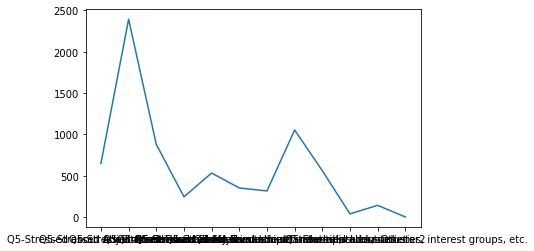

In [147]:
sns.lineplot(data=sl.loc[lambda x: x["cluster2"] == 0].sum())

No. That's not right. It'll come to me, eventually. 